In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import os

In [10]:
class NeuralNet(nn.Module):
    
    def __init__(self,nb_inputs,nb_outputs):
        super(NeuralNet,self).__init__()
        self.nb_inputs = nb_inputs
        self.nb_outputs = nb_outputs
        self.first = nn.Linear(nb_inputs,30)
        self.second = nn.Linear(30,15)
        self.third = nn.Linear(15,nb_outputs)
#         self.op_activation = nn.Softmax(dim=1)
    
    def forward(self,input_data):
        out = F.relu(self.first(input_data))
        out = F.relu(self.second(out))
        out = torch.sigmoid(self.third(out))
#         out = self.op_activation(out)
        return out

In [22]:
class Model():
    
    def __init__(self,num_inputs,num_outputs,learning_rate=0.001):
        self.nb_inputs = num_inputs
        self.nb_outputs = num_outputs
        self.lr = learning_rate
#         self.batch_size = batch_size
        self.model_save_path = '../Models'
#         self.network = NeuralNet(num_inputs,num_outputs)
        self.network = self.load_model(num_inputs,num_outputs)
        self.optimiser = optim.Adam(self.network.parameters(),lr=self.lr)
        self.loss_fn = nn.BCELoss()
        
    
    def predict(self,input_data,as_array=True):
        with torch.no_grad():
            out = self.network.forward(torch.Tensor(input_data))
        if as_array:
            out = (out > 0.5).float()
            return out.numpy().ravel()
        else:
            return out
    
    def save_nn(self):
        torch.save(self.network.state_dict(),os.path.join(self.model_save_path,'NNModel.pth'))
        print('Saved Model! :)')
    
    def load_model(self,nb_inputs,nb_outputs):
        loaded_model = NeuralNet(nb_inputs,nb_outputs)
        if os.path.exists(os.path.join(self.model_save_path,'NNModel.pth')):
            print('Found a saved model and loaded!')
            loaded_model.load_state_dict(torch.load(os.path.join(self.model_save_path,'NNModel.pth')))
        else: print('No instance of any saved model!')
        return loaded_model
    
    def train(self,attributes,target,test_X,test_Y,batch_size=100,n_iter=10):
        num_rows = attributes.shape[0]
        acc_tray = []
#         total_error = 0
        for j in range(n_iter):
#             error = 0
            for i in range(0,num_rows,batch_size):
                data_slice = attributes[i:min(i+batch_size,num_rows)]
                target_slice = torch.Tensor(target[i:min(i+batch_size,num_rows)])
                net_output = self.network.forward(torch.Tensor(data_slice))
#                 net_output = torch.sigmoid(net_output)
#                 print(net_output)
#                 print(target_slice)
                loss = self.loss_fn(net_output,target_slice)
#                 error += loss.sum().item()
                self.optimiser.zero_grad()
                loss.backward()
                self.optimiser.step()
            
#             error /= num_rows
#             total_error += error
            
#             with torch.no_grad():
#                 temp_result = self.network.forward(torch.Tensor(test_X))
            
            temp_result = self.predict(test_X,as_array=False)
            temp_result = (temp_result > 0.5).float()
            accuracy = torch.sum(temp_result == torch.Tensor(test_Y)).item() / test_Y.shape[0]
            acc_tray.append(accuracy)
            
            print(f'Iteration {j+1}:')
            print(f'Accuracy on test set: {accuracy:.3f}')
            print()
            if accuracy >= 0.85:
                self.save_nn()
                return acc_tray
        return acc_tray
#             print(f'Error: {error}')
#             print(f'Mean error for the overall training process: {total_error/(j+1)}')
            

Iteration 1:
Accuracy on test set: 0.770

Iteration 2:
Accuracy on test set: 0.785

Iteration 3:
Accuracy on test set: 0.809

Iteration 4:
Accuracy on test set: 0.803

Iteration 5:
Accuracy on test set: 0.797

Iteration 6:
Accuracy on test set: 0.809

Iteration 7:
Accuracy on test set: 0.818

Iteration 8:
Accuracy on test set: 0.818

Iteration 9:
Accuracy on test set: 0.815

Iteration 10:
Accuracy on test set: 0.821

Iteration 11:
Accuracy on test set: 0.827

Iteration 12:
Accuracy on test set: 0.824

Iteration 13:
Accuracy on test set: 0.833

Iteration 14:
Accuracy on test set: 0.830

Iteration 15:
Accuracy on test set: 0.824

Iteration 16:
Accuracy on test set: 0.827

Iteration 17:
Accuracy on test set: 0.824

Iteration 18:
Accuracy on test set: 0.836

Iteration 19:
Accuracy on test set: 0.827

Iteration 20:
Accuracy on test set: 0.821

Iteration 21:
Accuracy on test set: 0.830

Iteration 22:
Accuracy on test set: 0.833

Iteration 23:
Accuracy on test set: 0.830

Iteration 24:
Accura

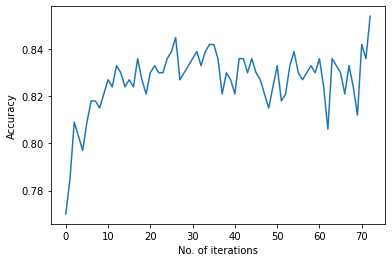

In [19]:
# from sklearn.datasets import load_wine
if __name__ == '__main__':
    from sklearn.preprocessing import StandardScaler
    from sklearn.model_selection import train_test_split
    import pandas as pd
    import matplotlib.pyplot as plt

    data = pd.read_csv('../Datasets/data.csv')
    targets = data['Placed'].values
    del data['Placed']
    features = data.values

    scaler = StandardScaler()
    X = scaler.fit_transform(features)
    Y = targets.reshape(-1,1)
    # Y = targets

    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
    # print(Y_train.value_counts())
    # print(Y_test.value_counts())

    test = Model(X.shape[1],1,learning_rate=0.01)
    acc_tray = test.train(X_train,Y_train,X_test,Y_test,batch_size=50,n_iter=1000)

    # print(len(acc_tray))
    plt.plot(acc_tray)
    plt.ylabel('Accuracy')
    plt.xlabel('No. of iterations')
    plt.show()

In [20]:
# results = test.predict(X_test[:5])
# print(results)

[[1.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [ ]:
# import pickle as pkl
# pkl.dump(test,open('../Models/NNModel.pkl','wb'))
# print('Saved Model!')

In [ ]:
# test_obj = pkl.load(open('../Models/NNModel.pkl','rb'))
# results = test_obj.predict(X_test[:5])
# print(results)